<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/develop/Instagram_influencers_EDA%2C_statistical(Atividade_Complementar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style='background:#00FFFF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>TOP INSTAGRAM INFLUENCERS DATA</center></h1>

<img src = "https://i.gifer.com/9uhG.gif" width = 900 height = 400/>

Sobre este arquivo:

Neste arquivo, basicamente há 10 atributos. Ele foi ordenado com base na classificação que foi decidida com base em "seguidores".

rank: Classificação do Influenciador com base no número de seguidores que ele tem

channel_info: Nome de usuário do Instagrammer

influence score: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

posts: Número de posts que eles fizeram até agora

followers: Número de seguidores do usuário

avg_likes: Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

60_day_eng_rate: Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

new_post_avg_like: Média de curtidas que eles têm em novos posts

total de curtidas: Total de curtidas que o usuário obteve em seus posts. (em bilhões)

country: País ou região de origem do usuário.
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

!gdown '1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i'

Downloading...
From: https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i
To: /content/top_insta_influencers_data.csv
100% 12.6k/12.6k [00:00<00:00, 23.7MB/s]


In [3]:
dataset = pd.read_csv('top_insta_influencers_data.csv')
## Visualize as primeiras linhas do DataFrame
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [4]:
#Vamos renomear as colunas para facilitar a interpretação
dataset.rename(columns={'rank':'Classificação'}, inplace=True)
dataset.rename(columns={'channel_info': 'Nome'}, inplace=True)
dataset.rename(columns={'influence_score': 'Pontuação'}, inplace=True)
dataset.rename(columns={'posts': 'Postagens'}, inplace=True)
dataset.rename(columns={'followers': 'Seguidores'}, inplace=True)
dataset.rename(columns={'avg_likes': 'Media_Curtidas'}, inplace=True)
dataset.rename(columns={'60_day_eng_rate': 'Taxa_Engajamento'}, inplace=True)
dataset.rename(columns={'new_post_avg_like': 'Media_Curtidas_Novas'}, inplace=True)
dataset.rename(columns={'total_likes': 'Likes'}, inplace=True)
dataset.rename(columns={'country': 'País'}, inplace=True)

<a id="title-two"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 3
px; color:black'><center>Visualize todas as informações
do DataFrame
 </center></h1>

In [5]:

dataset

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


Atividade 1: Análise Inicial dos Dados

In [6]:
# 1. Exibir as primeiras 10 linhas do DataFrame
dataset.head(10)


,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [7]:
# 2. Obter um resumo das estatísticas descritivas das colunas numéricas
dataset.describe()

,Classificação,Pontuação
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [10]:
# 3. Verificar se há valores ausentes em alguma coluna
dataset.isna().sum()

,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,0
Media_Curtidas_Novas,0
Likes,0
País,62


In [9]:
#4.visualização dos nomes das colunas
dataset.columns

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')

In [15]:
analise_insta = pd.DataFrame()

# Aplicar a função à coluna "Seguidores"
analise_insta['Influenciador'] = dataset['Nome']
analise_insta['Classificação'] = dataset['Classificação']

def convert_postagens(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        if 'm' in value:
            return float(value.replace('m', '')) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1000000000
        else:
            return float(value)  # Caso não tenha 'm', 'k' ou 'b'
    else:
        return value  # Se já for numérico, retorna o valor como está

# Aplicar a função às colunas relevantes
analise_insta['Postagens'] = dataset['Postagens'].apply(convert_postagens)
analise_insta['Seguidores'] = dataset['Seguidores'].apply(convert_postagens)
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas'].apply(convert_postagens)
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas'].apply(convert_postagens)

analise_insta["Taxa_Engajamento"] = dataset["Taxa_Engajamento"].replace("%", "", regex=True)
analise_insta["Taxa_Engajamento"] = analise_insta["Taxa_Engajamento"].astype(float) / 100

analise_insta['País'] = dataset['País']

print(analise_insta)


    Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0       cristiano              1     3300.0  475800000.0       8700000.0   
1     kyliejenner              2     6900.0  366200000.0       8300000.0   
2        leomessi              3      890.0  357300000.0       6800000.0   
3     selenagomez              4     1800.0  342700000.0       6200000.0   
4         therock              5     6800.0  334100000.0       1900000.0   
..            ...            ...        ...          ...             ...   
195     iambeckyg            196     2300.0   33200000.0        623800.0   
196    nancyajram            197     3800.0   33200000.0        390400.0   
197   luansantana            198      770.0   33200000.0        193300.0   
198     nickjonas            199     2300.0   33000000.0        719600.0   
199     raisa6690            200     4200.0   32800000.0        232200.0   

     Media_Curtidas_Novas  Taxa_Engajamento           País  
0               6500000.0 

In [13]:
dataset

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [21]:
# 1. Calcular a média, mediana e desvio padrão do número de seguidores


print(analise_insta['Seguidores'].mean())
print(analise_insta['Seguidores'].median())
print(analise_insta['Seguidores'].std())

77409500.0
50050000.0
73687269.78516681


In [22]:
# 2. Encontre o influenciador com o maior número de seguidores e o que tem o menor número de seguidores
print(analise_insta['Seguidores'].max())
print(analise_insta['Seguidores'].min())

475800000.0
32799999.999999996


In [24]:
analise_insta.loc[analise_insta['Seguidores'].idxmax()]

,0
Influenciador,cristiano
Classificação,1
Postagens,3300.0
Seguidores,475800000.0
Media_Curtidas,8700000.0
Media_Curtidas_Novas,6500000.0
Taxa_Engajamento,0.0139
País,Spain


In [25]:
analise_insta.loc[analise_insta['Seguidores'].idxmin()]

,199
Influenciador,raisa6690
Classificação,200
Postagens,4200.0
Seguidores,32800000.0
Media_Curtidas,232200.0
Media_Curtidas_Novas,97400.0
Taxa_Engajamento,0.003
País,Indonesia


In [26]:
# 3. Determine o número total de posts feitos por todos os influenciadores
total_post = analise_insta['Postagens'].sum()
print(total_post)

699970.0


Atividade 3: Visualização de Dados


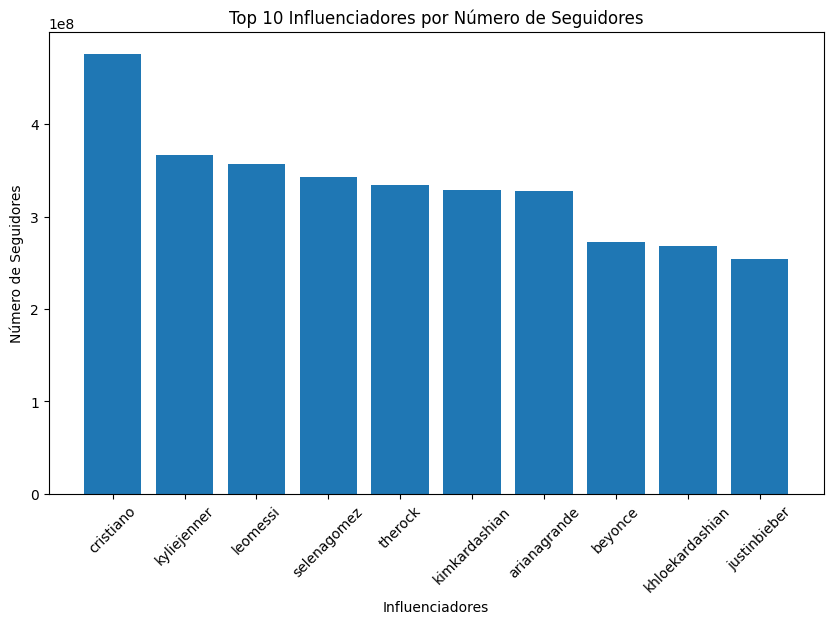

In [31]:
# 1. Criar um gráfico de barras mostrando o número de seguidores dos 10 principais influenciadores
#top10influencer = analise_insta.sort_values(by='Seguidores', ascending=False, inplace=True)
top_10 = analise_insta.nlargest(10, 'Seguidores')
plt.figure(figsize=(10,6))
plt.bar(top_10['Influenciador'], top_10['Seguidores'])
plt.xlabel('Influenciadores')
plt.ylabel('Número de Seguidores')
plt.title('Top 10 Influenciadores por Número de Seguidores')
plt.xticks(rotation=45)
plt.show()
#print(top_10)
#top_10.plot(kind='bar', x='Influenciador', y='Seguidores', title='Seguidores dos 10 Maiores Influenciadores')
#plt.show()

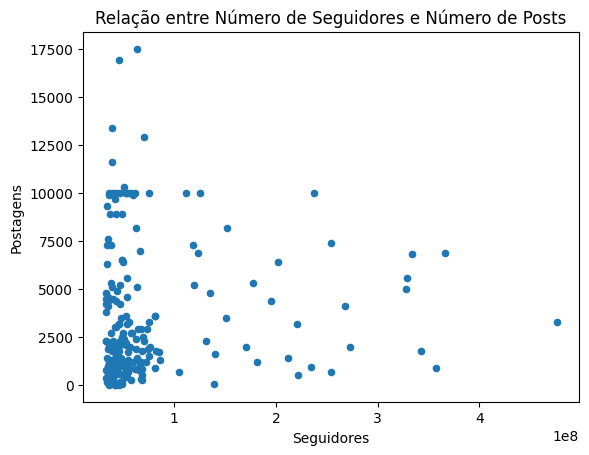

In [32]:
# 2. Plotar um gráfico de dispersão mostrando a relação entre o número de seguidores e o número de posts

analise_insta.plot(kind='scatter', x='Seguidores', y='Postagens', title='Relação entre Número de Seguidores e Número de Posts')
plt.show()

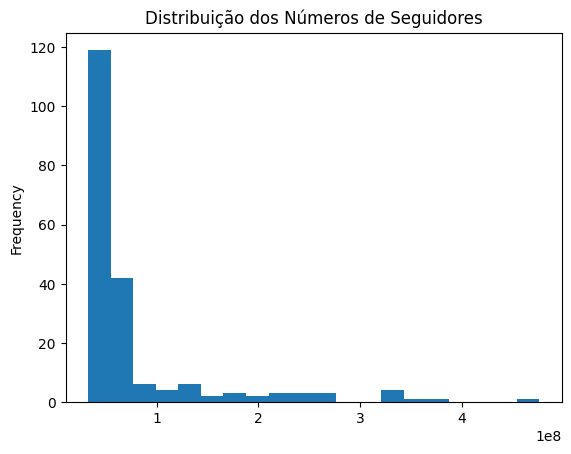

In [33]:
# 3. Criar um histograma para visualizar a distribuição dos números de seguidores
analise_insta['Seguidores'].plot(kind='hist', bins=20, title='Distribuição dos Números de Seguidores')
plt.show()

Atividade 4: Manipulação de Dados


In [40]:
# 1. Criar uma nova coluna que classifique os influenciadores em "Micro", "Macro" e "Mega"
analise_insta['Seguidores'].quantile([0, 1/3, 2/3, 1])

#analise_insta['category'] = pd.cut(analise_insta['Seguidores'],
#bins=[0, 50000, 1000000, float('inf')],
#                        labels=['Micro', 'Macro', 'Mega'])
#print(analise_insta['category'])

# é utilizado para segmentar e classificar dados em intervalos.
# 2. Encontre a média do número de seguidores para cada categoria de influenciador
analise_insta.groupby('category')['Seguidores'].mean()

# 3. Agrupar os dados por categoria de influenciador e calcular a soma total dos posts para cada categoria
analise_insta.groupby('category')['Seguidores'].sum()


<ipython-input-40-e0053abaaa57>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_insta.groupby('category')['Seguidores'].mean()
<ipython-input-40-e0053abaaa57>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_insta.groupby('category')['Seguidores'].sum()


,Seguidores
category,
Micro,0.000000e+00
Macro,0.000000e+00
Mega,1.548190e+10


Atividade 5: Proporção

In [45]:
#1.Qual é a proporção de influenciadores que possuem uma taxa de engajamento nos últimos 60 dias superior a 5%?

engajamento_superior_5 = analise_insta[analise_insta['Taxa_Engajamento'] > 0.05]
proporcao_engajamento_superior_5 = len(engajamento_superior_5) / len(analise_insta)
print(f"Proporção de influenciadores com taxa de engajamento superior a 5%: {proporcao_engajamento_superior_5:.2%}")
print(len(engajamento_superior_5))
print(len(analise_insta))

# Converter 'Taxa_Engajamento' column to numeric
#já Esta graças a função do começo



# 2. Calcular a proporção de influenciadores com taxa de engajamento superior a 5%
# Exibir a proporção


Proporção de influenciadores com taxa de engajamento superior a 5%: 9.00%
18
200


In [46]:
print(engajamento_superior_5)

          Influenciador  Classificação  Postagens   Seguidores  \
32         billieeilish             33      690.0  105200000.0   
38         lalalalisa_m             39      870.0   80900000.0   
49       jennierubyjane             50      860.0   68900000.0   
53       tomholland2013             54     1200.0   67700000.0   
56   bts.bighitofficial             57     1200.0   66900000.0   
64            sooyaaa__             65      830.0   62900000.0   
69      roses_are_rosie             70      820.0   61800000.0   
75     milliebobbybrown             76      280.0   57600000.0   
78               karolg             79     3300.0   55600000.0   
83             zacefron             84      660.0   54500000.0   
102                 thv            103       60.0   49300000.0   
114         harrystyles            115      590.0   46900000.0   
118                zayn            119      160.0   46500000.0   
120         travisscott            121     3200.0   46200000.0   
138       

In [ ]:
#2.Qual a proporção de influenciadores cujo número de seguidores representa mais de 10% do total de seguidores de
#todos os influenciadores juntos?


In [ ]:
#3.Qual é a proporção de influenciadores que possuem uma média de curtidas em novos posts superior à média de
#curtidas em todos os seus posts?


In [ ]:
#4.Qual a proporção de influenciadores que têm um "influence score" maior do que a média do "influence score"
# de todo o banco de dados?


In [ ]:
#5.Qual é a proporção de influenciadores originários de um determinado país (por exemplo, EUA) em relação ao total
#de influenciadores no banco de dados?